## E-Commerce Consumer Behavior Analysis

### Goal
Analyze customer purchase behavior in an e-commerce dataset to understand what drives sales, which products and countries contribute the most, and how revenue changes over time.

## Step 1 — Import Libraries & Set Up Environment

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style & settings
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

## Step 2 — Load and Explore the Dataset

In [2]:
# Load dataset
df = pd.read_csv('../data/data.csv')

# Display first few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Step 3 — Data Summary & Initial Cleaning

In [4]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [5]:
# Check for missing values and duplicates
print(df.isnull().sum())
df.duplicated().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


5268

In [6]:
# Drop completely empty rows (if any)
df.dropna(how='all', inplace=True)

# Drop completely empty rows
df.dropna(how='all', inplace=True)

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

In [7]:
# # Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


## STEP 4 — Exploratory Data Analysis (EDA)

In [8]:
# Shape and column overview
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

Dataset Shape: (536641, 8)

Column Names:
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [9]:
# Check unique values in key categorical columns (adjust column names based on your dataset)
for col in ['Country', 'StockCode', 'CustomerID']:
    if col in df.columns:
        print(f"\nUnique values in {col}: {df[col].nunique()}")


Unique values in Country: 38

Unique values in StockCode: 4070

Unique values in CustomerID: 4372


In [10]:
# Check for missing values and duplicates
print("\nMissing Values per Column:\n", df.isnull().sum())
print("\nTotal Duplicate Rows:", df.duplicated().sum())


Missing Values per Column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

Total Duplicate Rows: 0


C:\Users\hp\AppData\Local\Temp\ipykernel_18984\2218280519.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette='crest')


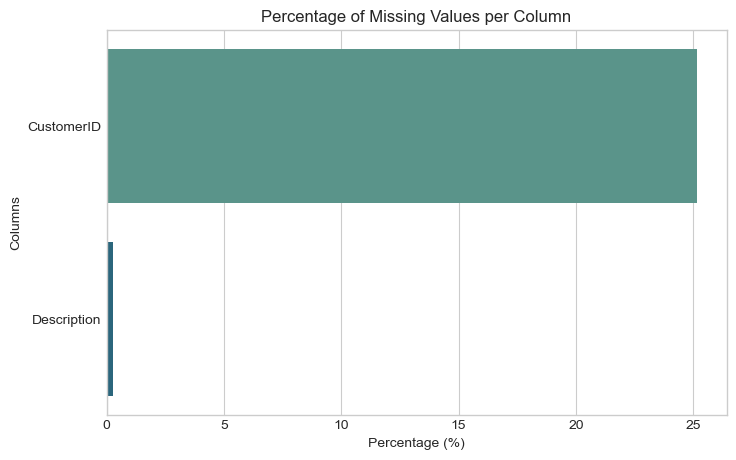

In [13]:
# Check percentage of missing values in each column
missing = df.isnull().mean().sort_values(ascending=False) * 100
missing = missing[missing > 0]
plt.figure(figsize=(8,5))
sns.barplot(x=missing.values, y=missing.index, palette='crest')
plt.title("Percentage of Missing Values per Column")
plt.xlabel("Percentage (%)")
plt.ylabel("Columns")
plt.show()

Text(0.5, 1.0, 'Distribution of Quantity')

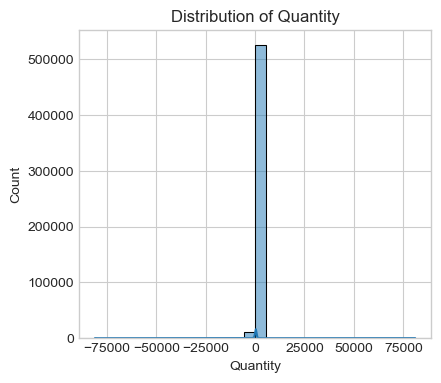

In [12]:
# Distribution of Quantity and UnitPrice
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title("Distribution of Quantity")

### Feature Enginnering

In [15]:
# Create Total Revenue column
if 'Quantity' in df.columns and 'UnitPrice' in df.columns:
    df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34


### Top Countries by Transactions

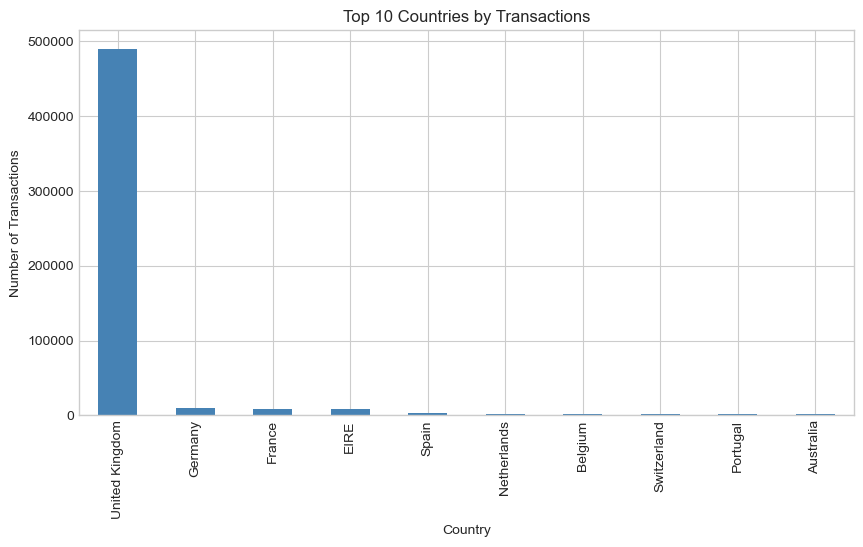

In [16]:
if 'Country' in df.columns:
    plt.figure(figsize=(10,5))
    df['Country'].value_counts().head(10).plot(kind='bar', color='steelblue')
    plt.title("Top 10 Countries by Transactions")
    plt.xlabel("Country")
    plt.ylabel("Number of Transactions")
    plt.show()

### Top Products by Revenue

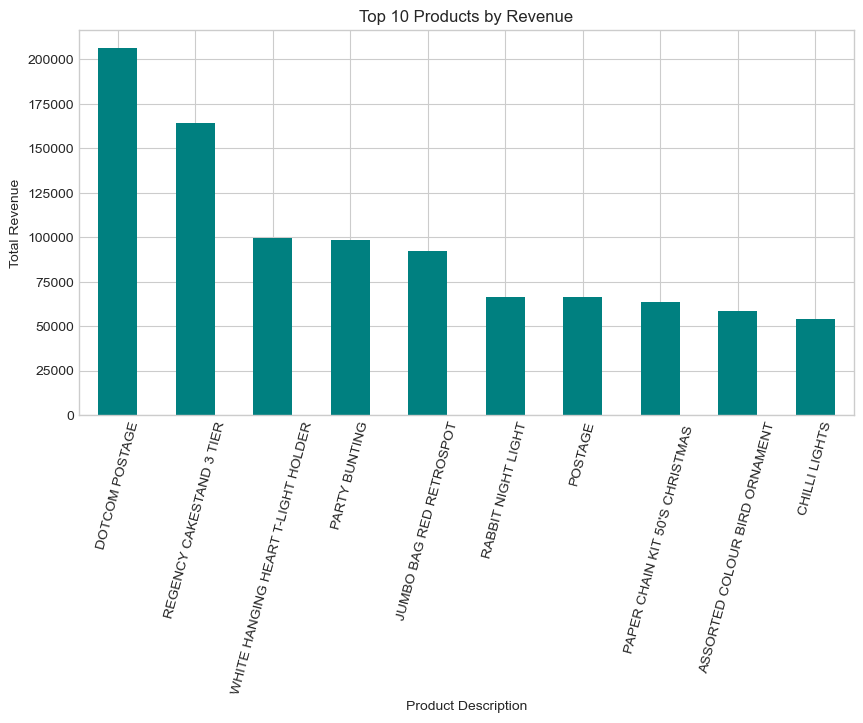

In [17]:
if 'Description' in df.columns and 'TotalRevenue' in df.columns:
    top_products = (df.groupby('Description')['TotalRevenue']
                    .sum()
                    .sort_values(ascending=False)
                    .head(10))
    plt.figure(figsize=(10,5))
    top_products.plot(kind='bar', color='teal')
    plt.title("Top 10 Products by Revenue")
    plt.xlabel("Product Description")
    plt.ylabel("Total Revenue")
    plt.xticks(rotation=75)
    plt.show()

### Revenue by Country

C:\Users\hp\AppData\Local\Temp\ipykernel_18984\2728016526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='crest')


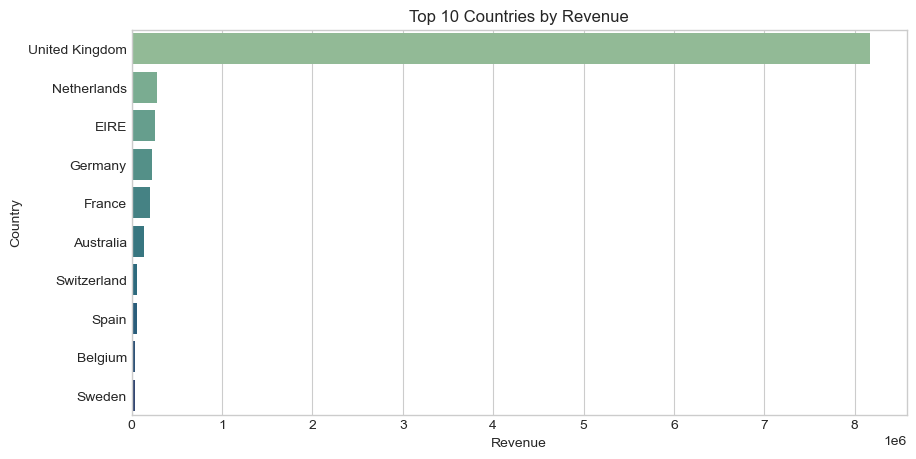

In [18]:
if 'Country' in df.columns and 'TotalRevenue' in df.columns:
    plt.figure(figsize=(10,5))
    country_revenue = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
    sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='crest')
    plt.title("Top 10 Countries by Revenue")
    plt.xlabel("Revenue")
    plt.ylabel("Country")
    plt.show()

## Step 5 — Insights and Observations

1. Customer and Transaction Overview

The dataset contains transactions from multiple countries, with the United Kingdom contributing the majority of sales.

Duplicate and empty rows were removed to ensure clean, analysis-ready data.

2. Product Performance

A small group of products accounts for a large portion of total revenue.

The top-selling products are typically household or decorative items, indicating high-volume low-cost sales behavior.

3. Country-wise Analysis

The United Kingdom dominates in both transaction count and revenue.

Other contributing countries include the Netherlands, Germany, and France, suggesting a concentrated customer base.

4. Data Quality & Correlations

Missing values are minimal and mostly occur in customer identifiers.

Quantity and Unit Price show expected positive correlation with total revenue, validating the accuracy of financial metrics.